In [522]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [523]:
train_df = pd.read_csv("./databases/train.csv")
test_df =  pd.read_csv("./databases/test.csv")

In [524]:
train_df 

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [525]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,19/10/2018 16:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,19/10/2018 16:15,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,19/10/2018 16:30,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,19/10/2018 16:45,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,19/10/2018 17:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,31/12/2018 23:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,31/12/2018 23:15,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,31/12/2018 23:30,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,31/12/2018 23:45,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [526]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                         0
date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64


In [527]:
test_df_null = test_df.isnull()
print(test_df_null.sum())

Id                                        0
date                                      0
Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh      0
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                              692
Day_of_week                             692
Load_Type                                 0
dtype: int64


In [528]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df['Leading_Current_Reactive_Power_kVarh'] = imputer_mean.fit_transform(train_df[['Leading_Current_Reactive_Power_kVarh']])
train_df['Leading_Current_Power_Factor'] = imputer_mean.fit_transform(train_df[['Leading_Current_Power_Factor']])

In [529]:
def weekStatus(day):
    if day in ['Saturday','Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
    
train_df ['WeekStatus'] = train_df['Day_of_week'].apply(weekStatus)   
test_df ['WeekStatus'] = test_df['Day_of_week'].apply(weekStatus)   

In [530]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%d/%m/%Y %H:%M')
test_df['date'] = pd.to_datetime(test_df['date'], format='%d/%m/%Y %H:%M')

train_df['Day_of_week'] = train_df['date'].dt.day_name()
test_df['Day_of_week'] = test_df['date'].dt.day_name()

In [531]:
train_df_null = train_df.isnull()
print(train_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64


In [532]:
test_df_null = test_df.isnull()
print(test_df_null.sum())

Id                                      0
date                                    0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [533]:
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [534]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [535]:
categorical_features = ['WeekStatus', 'Day_of_week', 'Load_Type']

for feature in categorical_features:
    print(train_df[feature].unique())

print()

for feature in categorical_features:
    print(test_df[feature].unique())

['Weekday' 'Weekend']
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
['Light_Load' 'Medium_Load' 'Maximum_Load']

['Weekday' 'Weekend']
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
['Maximum_Load' 'Medium_Load' 'Light_Load']


In [536]:
label_encoder = LabelEncoder()
train_df_label_encoder = train_df.copy()
test_df_label_encoder = test_df.copy()

for feature in categorical_features:
    train_df_label_encoder[feature] = label_encoder.fit_transform(train_df_label_encoder[feature])
    test_df_label_encoder[feature] = label_encoder.transform(test_df_label_encoder[feature])

In [537]:
train_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


In [538]:
test_df

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,Weekday,Friday,Maximum_Load
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,Weekday,Friday,Maximum_Load
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,Weekday,Friday,Maximum_Load
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,Weekday,Friday,Maximum_Load
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,Weekday,Friday,Maximum_Load
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,Weekday,Monday,Light_Load
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,Weekday,Monday,Light_Load
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,Weekday,Monday,Light_Load
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,Weekday,Monday,Light_Load


In [539]:
train_df_label_encoder

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018-01-01 00:15:00,2.95,0.0,0.00,73.21,100.0,900,0,1,0,3.17
1,2,2018-01-01 00:30:00,4.46,0.0,0.00,66.77,100.0,1800,0,1,0,4.00
2,3,2018-01-01 00:45:00,3.28,0.0,0.00,70.28,100.0,2700,0,1,0,3.24
3,4,2018-01-01 01:00:00,3.56,0.0,0.00,68.09,100.0,3600,0,1,0,3.31
4,5,2018-01-01 01:15:00,4.50,0.0,0.00,64.72,100.0,4500,0,1,0,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018-10-19 14:45:00,32.62,0.0,0.02,85.75,100.0,53100,0,0,1,54.36
27995,27996,2018-10-19 15:00:00,35.46,0.0,0.03,84.76,100.0,54000,0,0,1,56.63
27996,27997,2018-10-19 15:15:00,30.92,0.0,0.03,89.63,100.0,54900,0,0,1,62.50
27997,27998,2018-10-19 15:30:00,58.18,0.0,0.04,83.89,100.0,55800,0,0,1,89.68


In [540]:
test_df_label_encoder

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,28000,2018-10-19 16:00:00,63.68,0.00,0.05,84.19,100.00,57600,0,0,1
1,28001,2018-10-19 16:15:00,54.18,0.00,0.04,85.28,100.00,58500,0,0,1
2,28002,2018-10-19 16:30:00,55.04,0.00,0.04,85.28,100.00,59400,0,0,1
3,28003,2018-10-19 16:45:00,36.40,0.00,0.03,84.13,100.00,60300,0,0,1
4,28004,2018-10-19 17:00:00,35.17,0.00,0.03,85.08,100.00,61200,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7036,35036,2018-12-31 23:00:00,4.86,0.00,0.00,62.10,100.00,82800,0,1,0
7037,35037,2018-12-31 23:15:00,3.74,0.00,0.00,70.71,100.00,83700,0,1,0
7038,35038,2018-12-31 23:30:00,3.17,0.07,0.00,76.62,99.98,84600,0,1,0
7039,35039,2018-12-31 23:45:00,3.06,0.11,0.00,77.72,99.96,85500,0,1,0


In [541]:
train_df_label_encoder['month'] = train_df_label_encoder['date'].dt.month
train_df_label_encoder['day'] = train_df_label_encoder['date'].dt.day
train_df_label_encoder['hour'] = train_df_label_encoder['date'].dt.hour
train_df_label_encoder['minute'] = train_df_label_encoder['date'].dt.minute
train_df_label_encoder = train_df_label_encoder.drop(columns=['date'])
train_df_label_encoder = train_df_label_encoder.drop(columns=['Id'])

test_df_label_encoder['month'] = test_df_label_encoder['date'].dt.month
test_df_label_encoder['day'] = test_df_label_encoder['date'].dt.day
test_df_label_encoder['hour'] = test_df_label_encoder['date'].dt.hour
test_df_label_encoder['minute'] = test_df_label_encoder['date'].dt.minute
test_df_label_encoder = test_df_label_encoder.drop(columns=['date'])
test_df_label_encoder = test_df_label_encoder.drop(columns=['Id'])

In [542]:
train_df_label_encoder

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh,month,day,hour,minute
0,2.95,0.0,0.00,73.21,100.0,900,0,1,0,3.17,1,1,0,15
1,4.46,0.0,0.00,66.77,100.0,1800,0,1,0,4.00,1,1,0,30
2,3.28,0.0,0.00,70.28,100.0,2700,0,1,0,3.24,1,1,0,45
3,3.56,0.0,0.00,68.09,100.0,3600,0,1,0,3.31,1,1,1,0
4,4.50,0.0,0.00,64.72,100.0,4500,0,1,0,3.82,1,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,32.62,0.0,0.02,85.75,100.0,53100,0,0,1,54.36,10,19,14,45
27995,35.46,0.0,0.03,84.76,100.0,54000,0,0,1,56.63,10,19,15,0
27996,30.92,0.0,0.03,89.63,100.0,54900,0,0,1,62.50,10,19,15,15
27997,58.18,0.0,0.04,83.89,100.0,55800,0,0,1,89.68,10,19,15,30


In [543]:
test_df_label_encoder

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month,day,hour,minute
0,63.68,0.00,0.05,84.19,100.00,57600,0,0,1,10,19,16,0
1,54.18,0.00,0.04,85.28,100.00,58500,0,0,1,10,19,16,15
2,55.04,0.00,0.04,85.28,100.00,59400,0,0,1,10,19,16,30
3,36.40,0.00,0.03,84.13,100.00,60300,0,0,1,10,19,16,45
4,35.17,0.00,0.03,85.08,100.00,61200,0,0,1,10,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,4.86,0.00,0.00,62.10,100.00,82800,0,1,0,12,31,23,0
7037,3.74,0.00,0.00,70.71,100.00,83700,0,1,0,12,31,23,15
7038,3.17,0.07,0.00,76.62,99.98,84600,0,1,0,12,31,23,30
7039,3.06,0.11,0.00,77.72,99.96,85500,0,1,0,12,31,23,45


In [544]:
x = train_df_label_encoder.drop('Usage_kWh', axis=1)  
y = train_df_label_encoder['Usage_kWh']  

In [545]:
x

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month,day,hour,minute
0,2.95,0.0,0.00,73.21,100.0,900,0,1,0,1,1,0,15
1,4.46,0.0,0.00,66.77,100.0,1800,0,1,0,1,1,0,30
2,3.28,0.0,0.00,70.28,100.0,2700,0,1,0,1,1,0,45
3,3.56,0.0,0.00,68.09,100.0,3600,0,1,0,1,1,1,0
4,4.50,0.0,0.00,64.72,100.0,4500,0,1,0,1,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,32.62,0.0,0.02,85.75,100.0,53100,0,0,1,10,19,14,45
27995,35.46,0.0,0.03,84.76,100.0,54000,0,0,1,10,19,15,0
27996,30.92,0.0,0.03,89.63,100.0,54900,0,0,1,10,19,15,15
27997,58.18,0.0,0.04,83.89,100.0,55800,0,0,1,10,19,15,30


In [546]:
y

0         3.17
1         4.00
2         3.24
3         3.31
4         3.82
         ...  
27994    54.36
27995    56.63
27996    62.50
27997    89.68
27998    61.42
Name: Usage_kWh, Length: 27999, dtype: float64

In [547]:
scaler = MinMaxScaler()
numeric_features = ['month', 'day','hour', 'minute','Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']
train_df_std = pd.DataFrame(scaler.fit_transform(train_df_label_encoder[numeric_features]), columns=numeric_features)
test_df_std = pd.DataFrame(scaler.transform(test_df_label_encoder[numeric_features]), columns=numeric_features)

In [548]:
train_df_std

,month,day,hour,minute,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,0.0,0.0,0.000000,0.333333,0.030441,0.0,0.000000,0.575167,1.0,0.010526,0.0,0.166667,0.0
1,0.0,0.0,0.000000,0.666667,0.046022,0.0,0.000000,0.473042,1.0,0.021053,0.0,0.166667,0.0
2,0.0,0.0,0.000000,1.000000,0.033846,0.0,0.000000,0.528703,1.0,0.031579,0.0,0.166667,0.0
3,0.0,0.0,0.043478,0.000000,0.036735,0.0,0.000000,0.493974,1.0,0.042105,0.0,0.166667,0.0
4,0.0,0.0,0.043478,0.333333,0.046435,0.0,0.000000,0.440533,1.0,0.052632,0.0,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,1.0,0.6,0.608696,1.000000,0.336601,0.0,0.285714,0.774025,1.0,0.621053,0.0,0.000000,0.5
27995,1.0,0.6,0.652174,0.000000,0.365907,0.0,0.428571,0.758325,1.0,0.631579,0.0,0.000000,0.5
27996,1.0,0.6,0.652174,0.333333,0.319059,0.0,0.428571,0.835553,1.0,0.642105,0.0,0.000000,0.5
27997,1.0,0.6,0.652174,0.666667,0.600351,0.0,0.571429,0.744529,1.0,0.652632,0.0,0.000000,0.5


In [549]:
test_df_std

,month,day,hour,minute,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1.000000,0.6,0.695652,0.000000,0.657105,0.000000,0.714286,0.749286,1.000000,0.673684,0.0,0.000000,0.5
1,1.000000,0.6,0.695652,0.333333,0.559075,0.000000,0.571429,0.766572,1.000000,0.684211,0.0,0.000000,0.5
2,1.000000,0.6,0.695652,0.666667,0.567950,0.000000,0.571429,0.766572,1.000000,0.694737,0.0,0.000000,0.5
3,1.000000,0.6,0.695652,1.000000,0.375606,0.000000,0.428571,0.748335,1.000000,0.705263,0.0,0.000000,0.5
4,1.000000,0.6,0.739130,0.000000,0.362914,0.000000,0.428571,0.763400,1.000000,0.715789,0.0,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,1.222222,1.0,1.000000,0.000000,0.050150,0.000000,0.000000,0.398985,1.000000,0.968421,0.0,0.166667,0.0
7037,1.222222,1.0,1.000000,0.333333,0.038593,0.000000,0.000000,0.535522,1.000000,0.978947,0.0,0.166667,0.0
7038,1.222222,1.0,1.000000,0.666667,0.032711,0.002522,0.000000,0.629242,0.999771,0.989474,0.0,0.166667,0.0
7039,1.222222,1.0,1.000000,1.000000,0.031576,0.003963,0.000000,0.646686,0.999543,1.000000,0.0,0.166667,0.0


In [550]:
# Calculate z-scores for each feature in the training dataset
z_scores_train = (train_df_std - train_df_std.mean()) / train_df_std.std()

# Define a threshold for outlier detection (usually |z-score| > 3 is considered an outlier)
threshold = 3

# Find outliers
outliers_train = np.abs(z_scores_train) > threshold

print(outliers_train.sum())

month                                     0
day                                       0
hour                                      0
minute                                    0
Lagging_Current_Reactive.Power_kVarh    313
Leading_Current_Reactive_Power_kVarh    374
CO2(tCO2)                                22
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                                0
Day_of_week                               0
Load_Type                                 0
dtype: int64


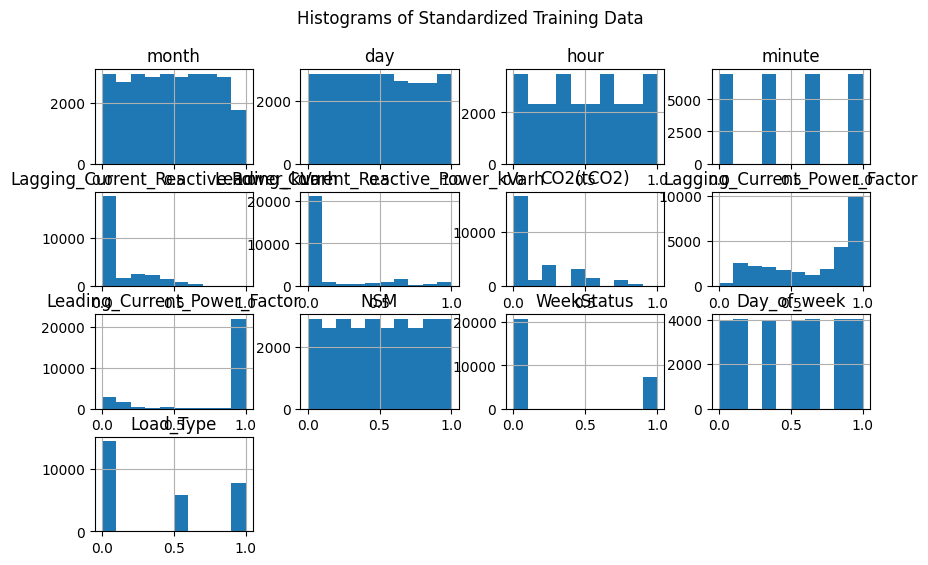

In [551]:
train_df_std.hist(figsize=(10, 6))
plt.suptitle('Histograms of Standardized Training Data')
plt.show()

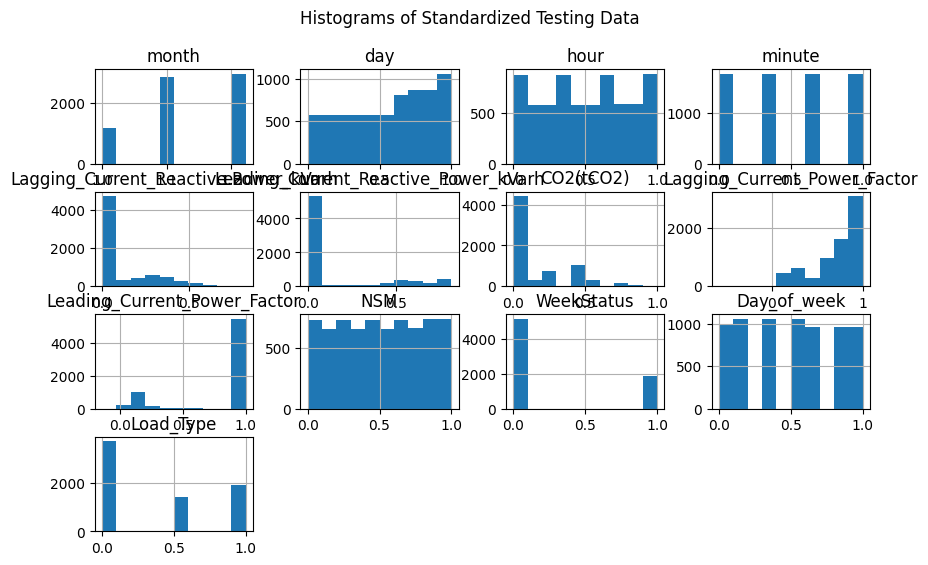

In [552]:
test_df_std.hist(figsize=(10, 6))
plt.suptitle('Histograms of Standardized Testing Data')
plt.show()

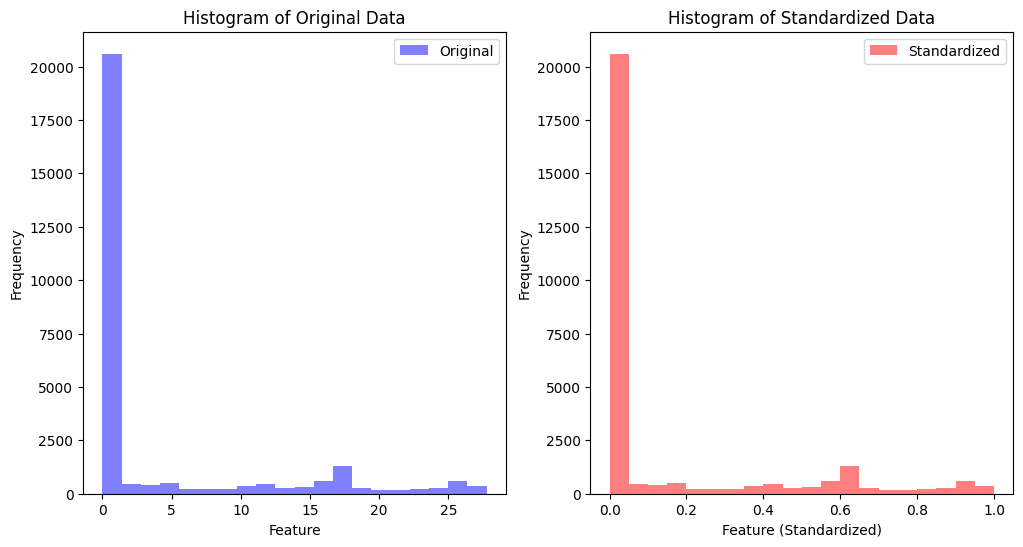

In [553]:
# Plot histograms of the original and standardized datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_df['Leading_Current_Reactive_Power_kVarh'], bins=20, color='blue', alpha=0.5, label='Original')
plt.title('Histogram of Original Data')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(train_df_std['Leading_Current_Reactive_Power_kVarh'], bins=20, color='red', alpha=0.5, label='Standardized')
plt.title('Histogram of Standardized Data')
plt.xlabel('Feature (Standardized)')
plt.ylabel('Frequency')
plt.legend()

plt.show()